In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [3]:
BASE_DIR = Path.cwd().parent  # Ajusta si es necesario
DATA_DIR = BASE_DIR / "data" / "processed"

contaminantes = pd.read_csv(DATA_DIR / "contaminantes.csv")
flujo = pd.read_csv(DATA_DIR / "flujo_vehicular.csv")
clima = pd.read_csv(DATA_DIR / "clima.csv")



In [4]:

print("Contaminantes:", contaminantes.shape)
print("FlujoVehicular:", flujo.shape)
print("Clima:", clima.shape)


Contaminantes: (1000, 7)
FlujoVehicular: (1000, 4)
Clima: (1000, 6)


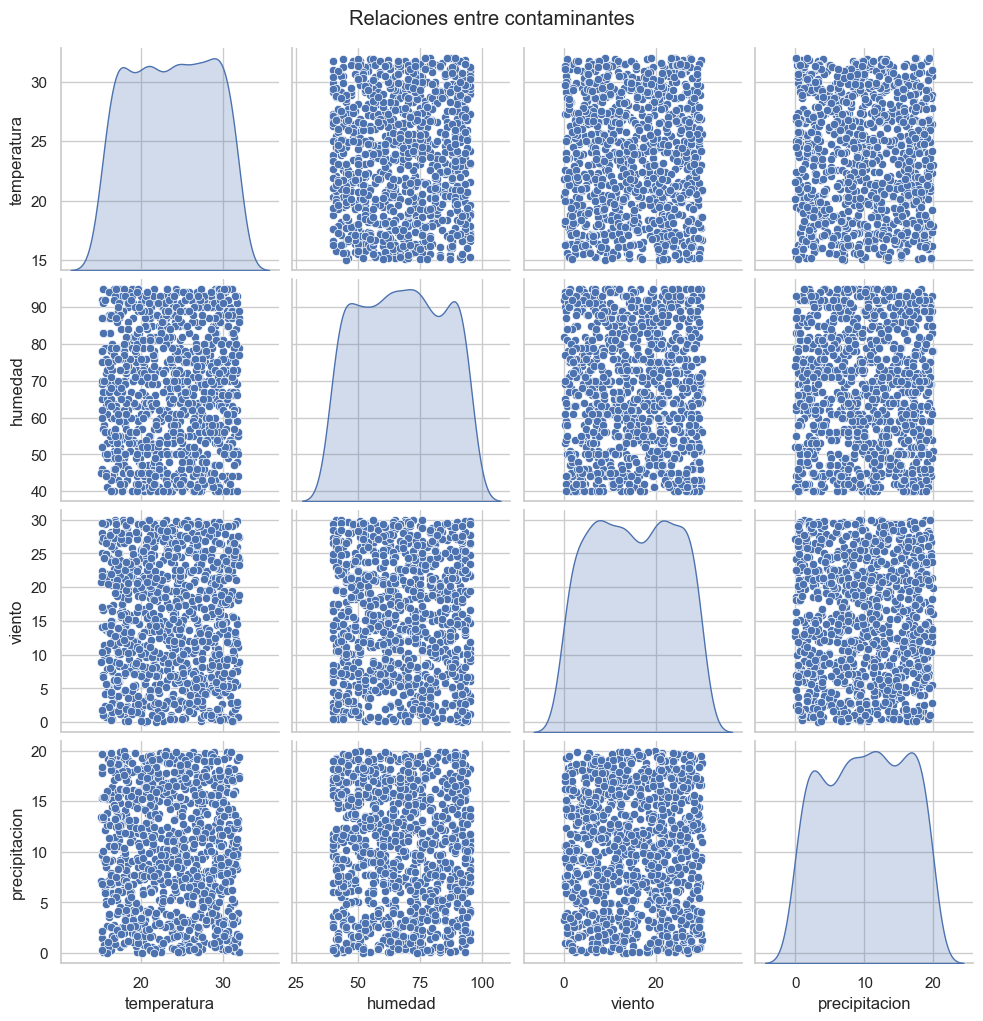

In [36]:
sns.pairplot(clima[["temperatura","humedad","viento","precipitacion"]].dropna(), diag_kind="kde")
plt.suptitle("Relaciones entre contaminantes", y=1.02)
plt.show()

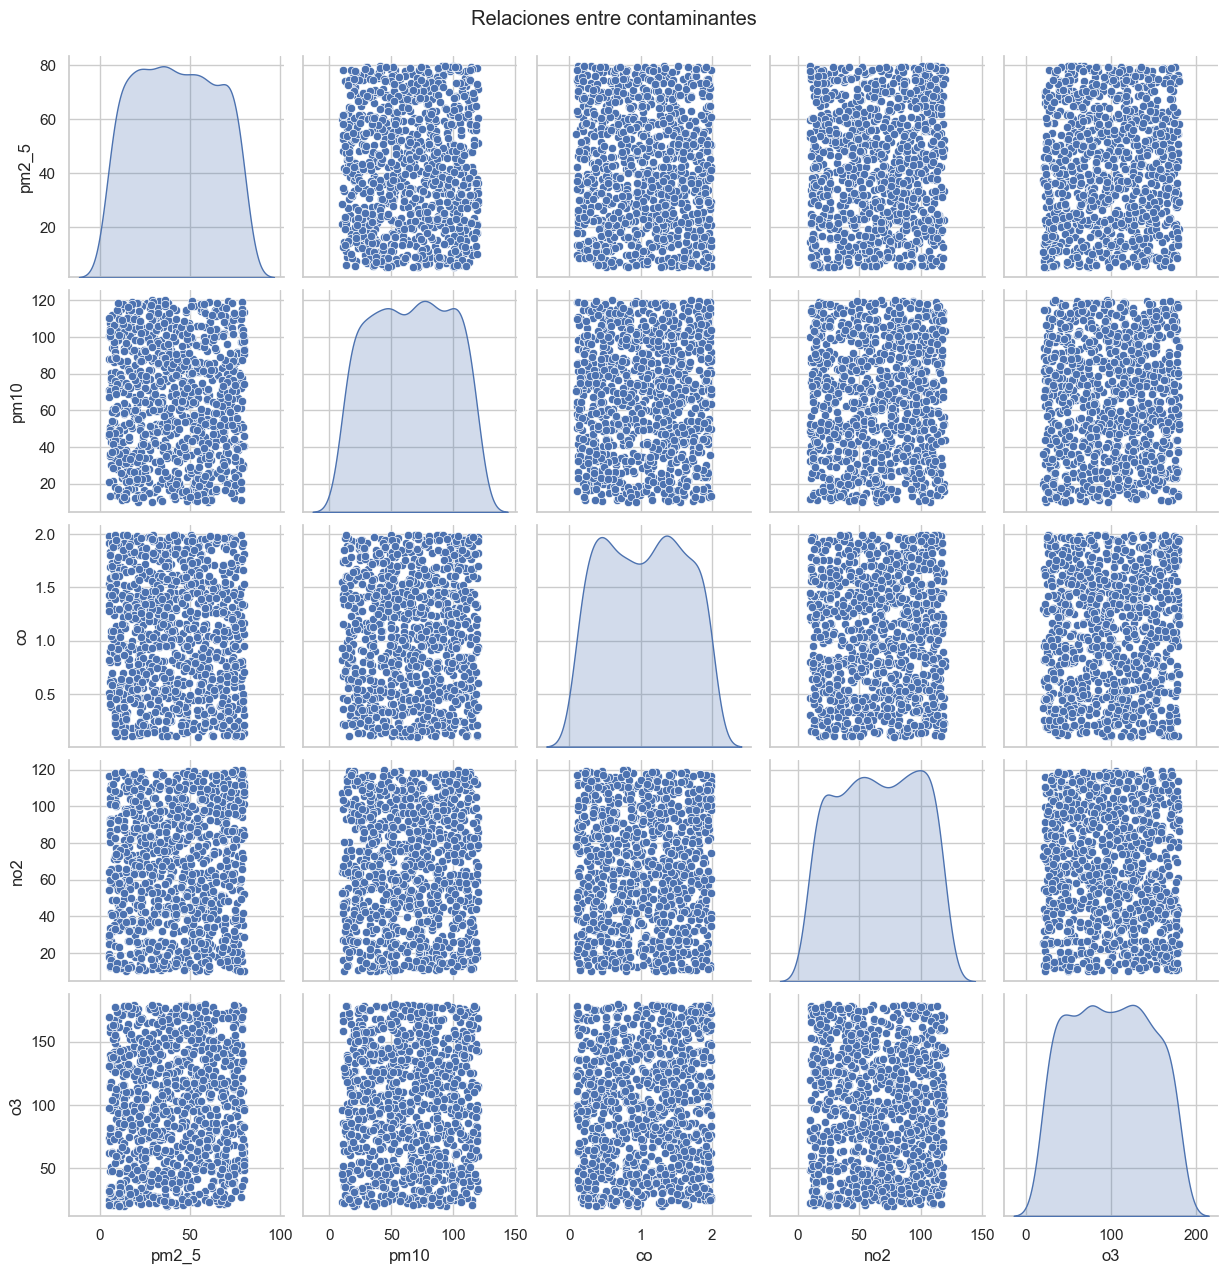

In [5]:

sns.pairplot(contaminantes[["pm2_5","pm10","co","no2","o3"]].dropna(), diag_kind="kde")
plt.suptitle("Relaciones entre contaminantes", y=1.02)
plt.show()


In [7]:

if "zona" in contaminantes.columns:
    plt.figure(figsize=(12,6))
    sns.violinplot(x="zona", y="pm2_5", data=contaminantes, inner="quartile", palette="muted")
    plt.title("Distribución de PM2.5 por zona")
    plt.show()


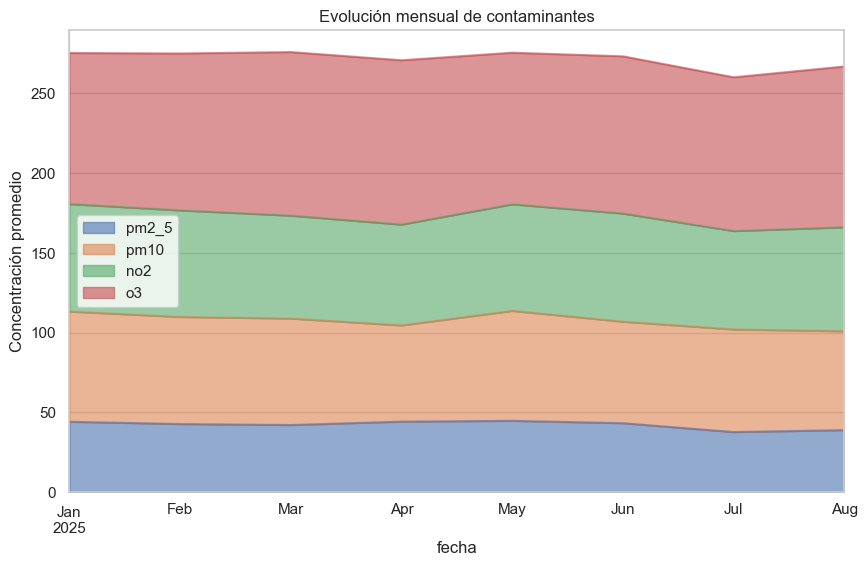

In [40]:

contaminantes["fecha"] = pd.to_datetime(contaminantes["fecha"], errors="coerce")
df_area = contaminantes.set_index("fecha")[["pm2_5","pm10","no2","o3"]].resample("ME").mean()
df_area.plot.area(alpha=0.6)
plt.title("Evolución mensual de contaminantes")
plt.ylabel("Concentración promedio")
plt.show()


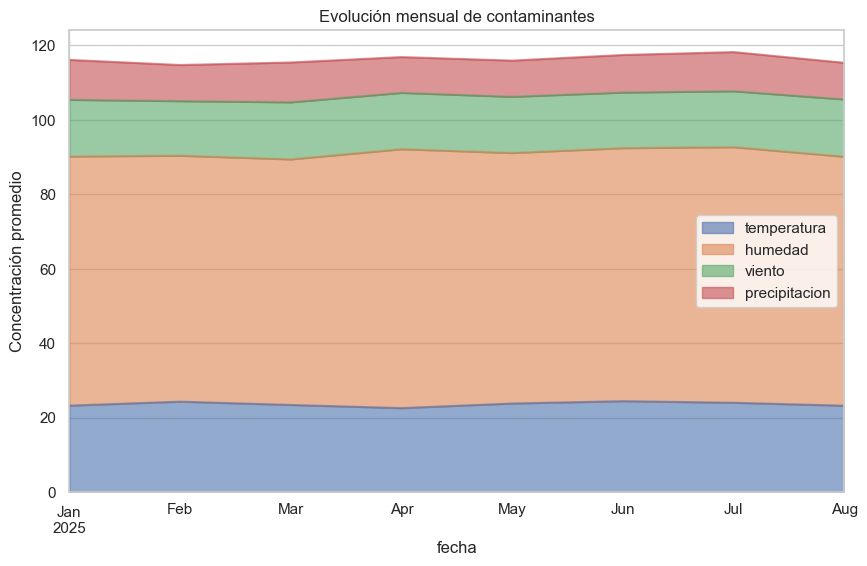

In [41]:

clima["fecha"] = pd.to_datetime(clima["fecha"], errors="coerce")
df_area = clima.set_index("fecha")[["temperatura","humedad","viento","precipitacion"]].resample("ME").mean()
df_area.plot.area(alpha=0.6)
plt.title("Evolución mensual de contaminantes")
plt.ylabel("Concentración promedio")
plt.show()


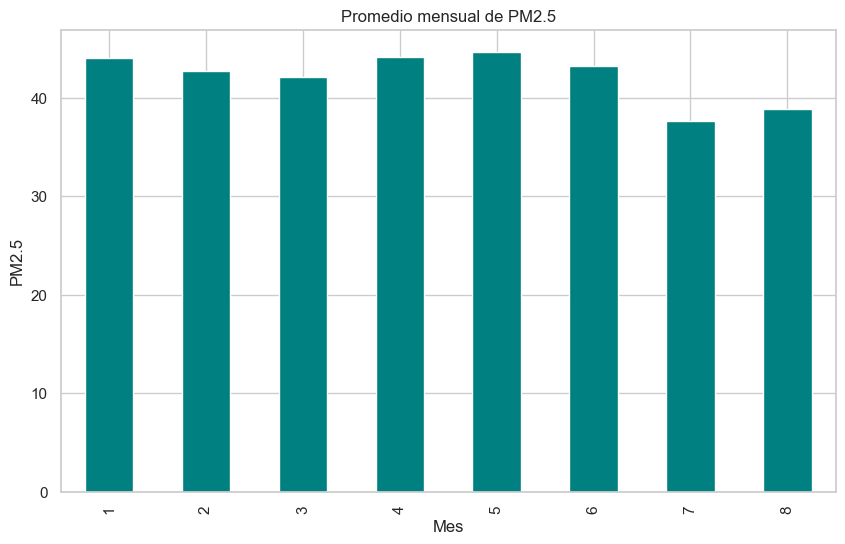

In [13]:

contaminantes["mes"] = contaminantes["fecha"].dt.month
promedio_mes = contaminantes.groupby("mes")["pm2_5"].mean()
promedio_mes.plot(kind="bar", color="teal")
plt.title("Promedio mensual de PM2.5")
plt.xlabel("Mes")
plt.ylabel("PM2.5")
plt.show()


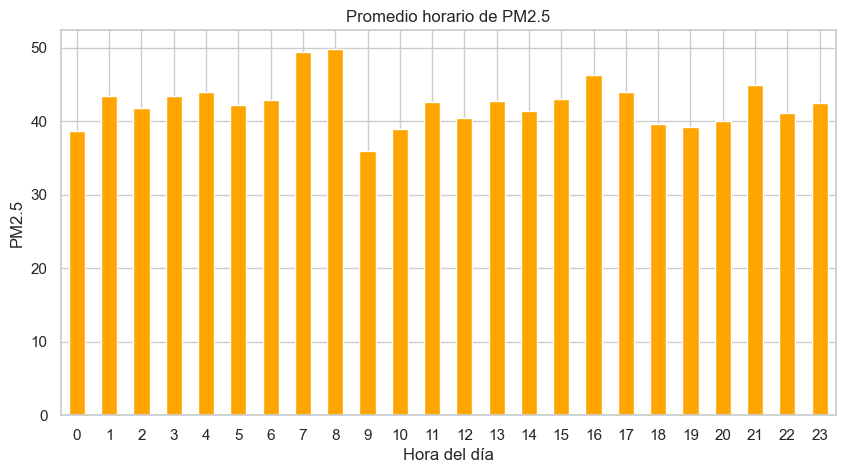

In [27]:
# Asegurarnos que la columna hora exista
if "hora" not in contaminantes.columns:
    contaminantes["hora"] = contaminantes["fecha"].dt.hour

# Calcular promedio de PM2.5 por hora
promedio_hora = contaminantes.groupby("hora")["pm2_5"].mean()

# Graficar
promedio_hora.plot(kind="bar", color="orange", figsize=(10,5))
plt.title("Promedio horario de PM2.5")
plt.xlabel("Hora del día")
plt.ylabel("PM2.5")
plt.xticks(rotation=0)
plt.show()


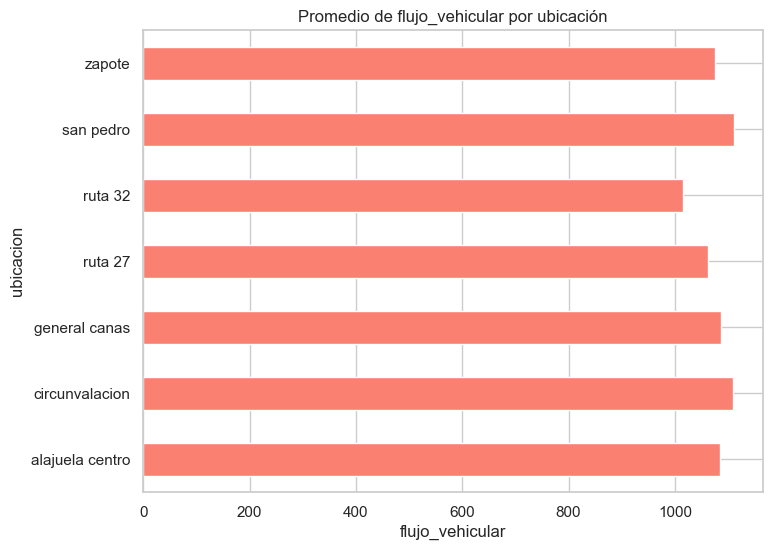

In [34]:
# Calcular promedio de PM2.5 por zona
if "ubicacion" in flujo.columns:
    promedio_ubicacion = flujo.groupby("ubicacion")["flujo_vehicular"].mean()

    # Gráfico
    promedio_ubicacion.plot(kind="barh", color="salmon", figsize=(8,6))
    plt.title("Promedio de flujo_vehicular por ubicación")
    plt.xlabel("flujo_vehicular")
    plt.ylabel("ubicacion")
    plt.show()
else:
    print(" No existe la columna 'ubicacion' en contaminantes.")


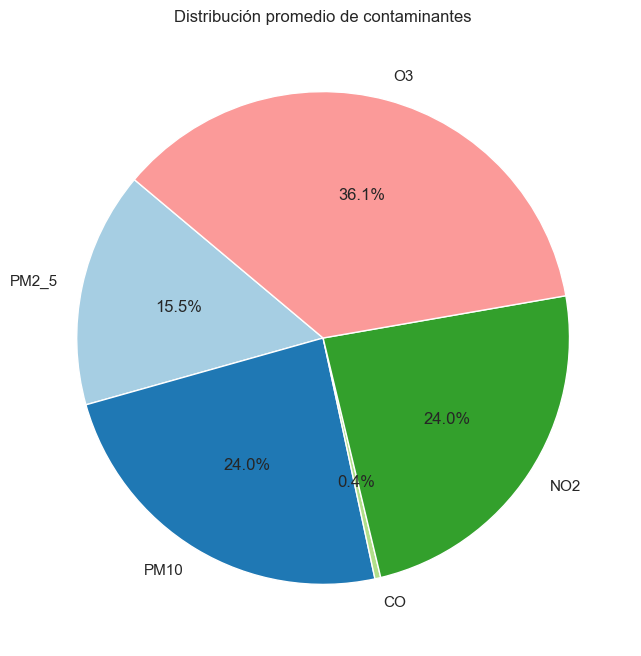

In [43]:
import matplotlib.pyplot as plt

# Definir contaminantes
pollutants = ["pm2_5", "pm10", "co", "no2", "o3"]

# Calcular promedio de cada variable
mean_values = contaminantes[pollutants].mean()

# Gráfico de pastel
plt.figure(figsize=(8,8))
plt.pie(mean_values, labels=mean_values.index.str.upper(),
        autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribución promedio de contaminantes")
plt.show()


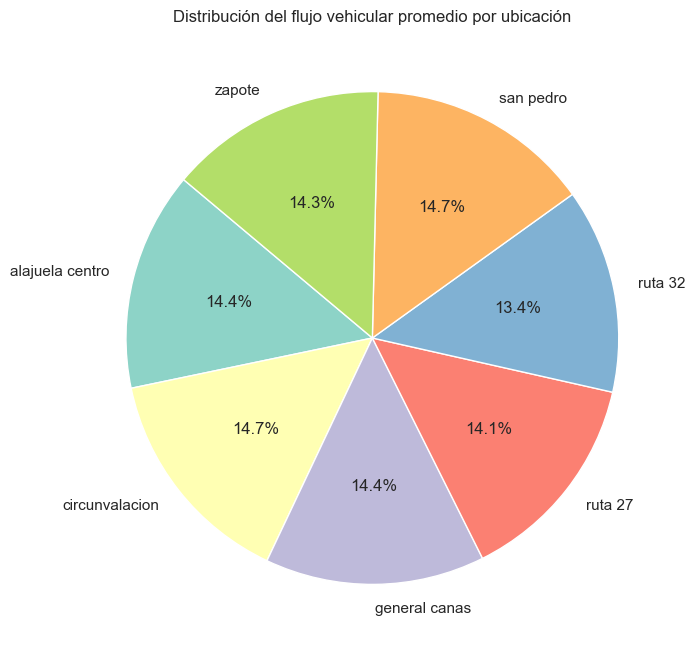

In [44]:
# Calcular promedio de flujo_vehicular por ubicación
if "ubicacion" in flujo.columns:
    promedio_ubicacion = flujo.groupby("ubicacion")["flujo_vehicular"].mean()

    # Gráfico de pastel
    plt.figure(figsize=(8,8))
    plt.pie(promedio_ubicacion,
            labels=promedio_ubicacion.index,
            autopct="%1.1f%%",
            startangle=140,
            colors=plt.cm.Set3.colors)

    plt.title("Distribución del flujo vehicular promedio por ubicación")
    plt.show()
else:
    print(" No existe la columna 'ubicacion' en flujo.")


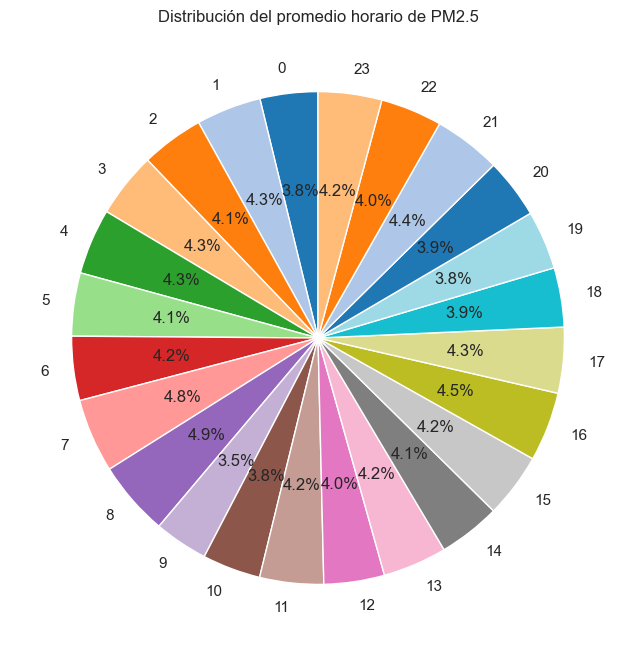

In [45]:
# Gráfico de pastel
plt.figure(figsize=(8,8))
plt.pie(promedio_hora,
        labels=promedio_hora.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.tab20.colors)

plt.title("Distribución del promedio horario de PM2.5")
plt.show()


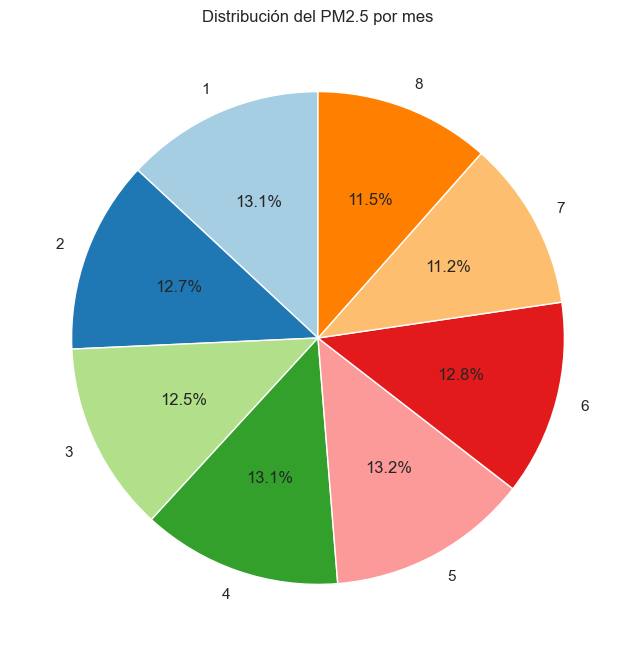

In [47]:
# Promedio mensual de PM2.5 en pastel
plt.figure(figsize=(8,8))
plt.pie(promedio_mes,
        labels=promedio_mes.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=plt.cm.Paired.colors)

plt.title("Distribución del PM2.5 por mes")
plt.show()
